In [1]:
!pip install seaborn --upgrade

In [2]:
!pip install mlxtend

In [3]:
!pip install plotly==5.5.0

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.__version__
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [3]:
# Loading the dataset
pcos = pd.read_csv('D:\\3rd Semester\\I (BIO201) = IBS-3\\Project\\PCOS_data.csv')
# Printing the first 5 rows of the dataset
pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
# pd.to_numeric is an inbuilt function that used to convert an argument to a numeric type. 
for i in ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)']:
    pcos[i] = pd.to_numeric(pcos[i], errors = 'coerce')
    
# Cleaning the dataset by removing the unnamed data and unwanted columns 
pcos = pcos.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis = 1)

In [5]:
# Printing the cleaned dataset
pcos.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [6]:
# Checking for missing/null values
pcos.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [7]:
# drop the missing values
pcos = pcos.dropna()

In [16]:
# Choosing colours by giving their hex codes
colors = ['#f4c2c2','#ADD8E6']

In [17]:
# Function to plot bar plots for a few attributes with its count
def bar_plot(variable):
    v = pcos[variable]
    var = v.value_counts()
    plt.figure(figsize = (9, 3))
    plt.bar(var.index, var, color = colors)
    plt.xticks(var.index, var.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var))

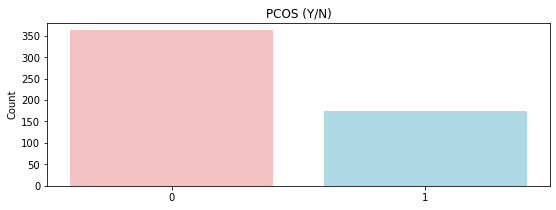

PCOS (Y/N): 
 0    362
1    175
Name: PCOS (Y/N), dtype: int64


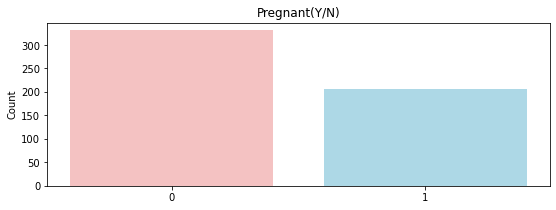

Pregnant(Y/N): 
 0    331
1    206
Name: Pregnant(Y/N), dtype: int64


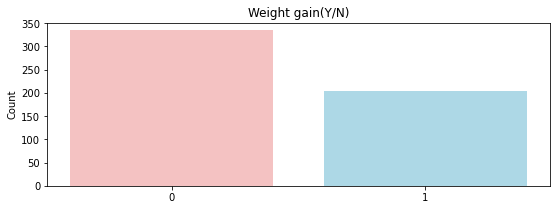

Weight gain(Y/N): 
 0    334
1    203
Name: Weight gain(Y/N), dtype: int64


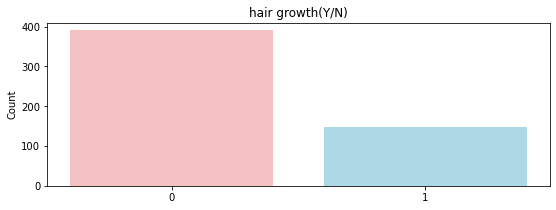

hair growth(Y/N): 
 0    390
1    147
Name: hair growth(Y/N), dtype: int64


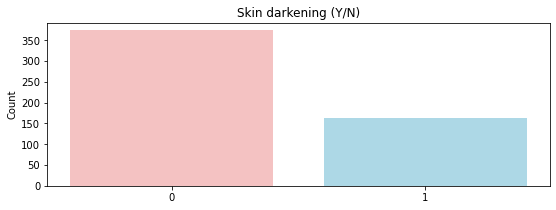

Skin darkening (Y/N): 
 0    373
1    164
Name: Skin darkening (Y/N), dtype: int64


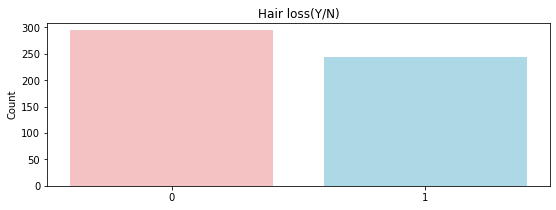

Hair loss(Y/N): 
 0    294
1    243
Name: Hair loss(Y/N), dtype: int64


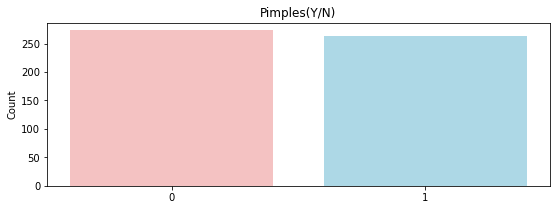

Pimples(Y/N): 
 0    273
1    264
Name: Pimples(Y/N), dtype: int64


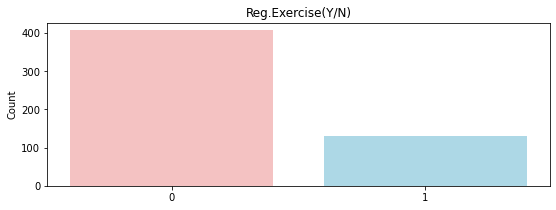

Reg.Exercise(Y/N): 
 0    406
1    131
Name: Reg.Exercise(Y/N), dtype: int64


In [22]:
# Giving the categories to plot the bar plot with its count
category = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
            "Pimples(Y/N)", "Reg.Exercise(Y/N)"]
for x in category:
    bar_plot(x)

In [19]:
# Function to plot histograms for a few attributes with its count
def plot_hist(variable):
    plt.figure(figsize = (9, 3))
    plt.hist(pcos[variable], bins = 50, color = colors[0])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

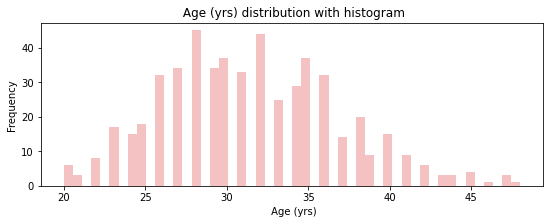

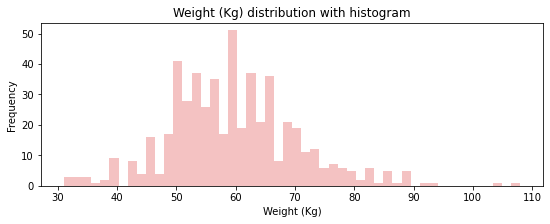

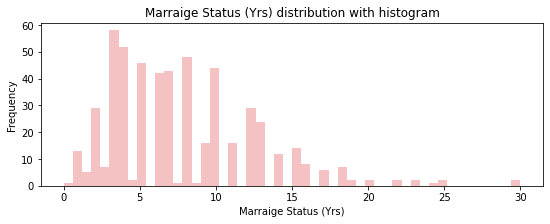

In [20]:
# Giving the categories to plot the histogram with its count
numericVariables = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVariables:
    plot_hist(n)

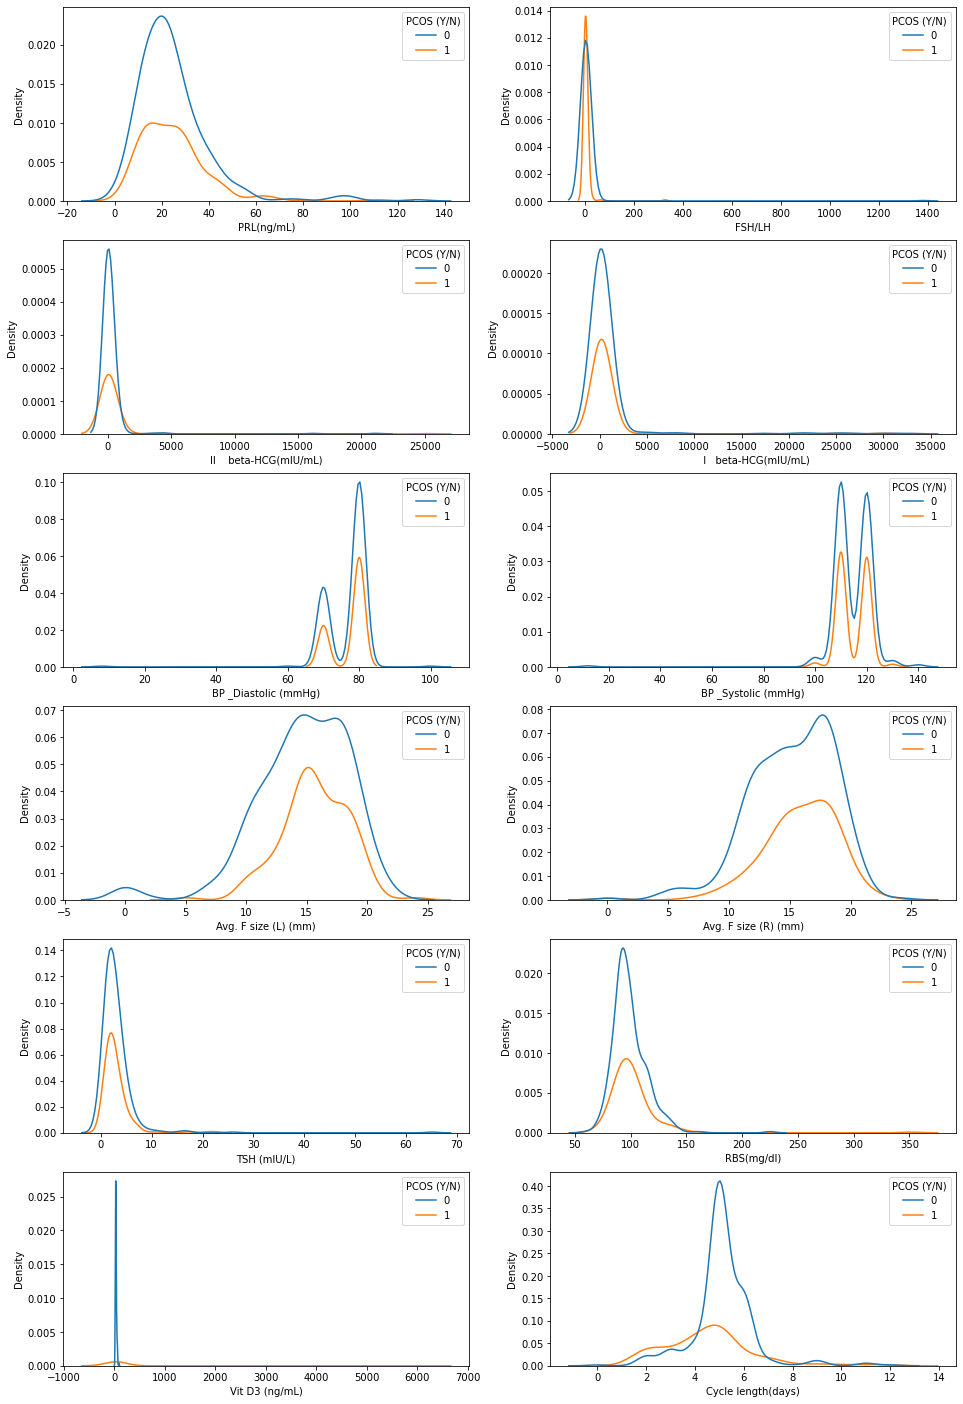

In [21]:
# Plotting the density level with a few attributes
continous=[ 'PRL(ng/mL)', 'FSH/LH', 'II    beta-HCG(mIU/mL)', '  I   beta-HCG(mIU/mL)', 'BP _Diastolic (mmHg)', 
            'BP _Systolic (mmHg)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'TSH (mIU/L)', 'RBS(mg/dl)',
            'Vit D3 (ng/mL)','Cycle length(days)']

f, axes = plt.subplots(6, 2, figsize=(16,25))
k = 0
for i in range(0,6):
    for j in range(0,2):
        sns.kdeplot(data = pcos, x = continous[k], hue = "PCOS (Y/N)", ax = axes[i][j])
        k = k + 1

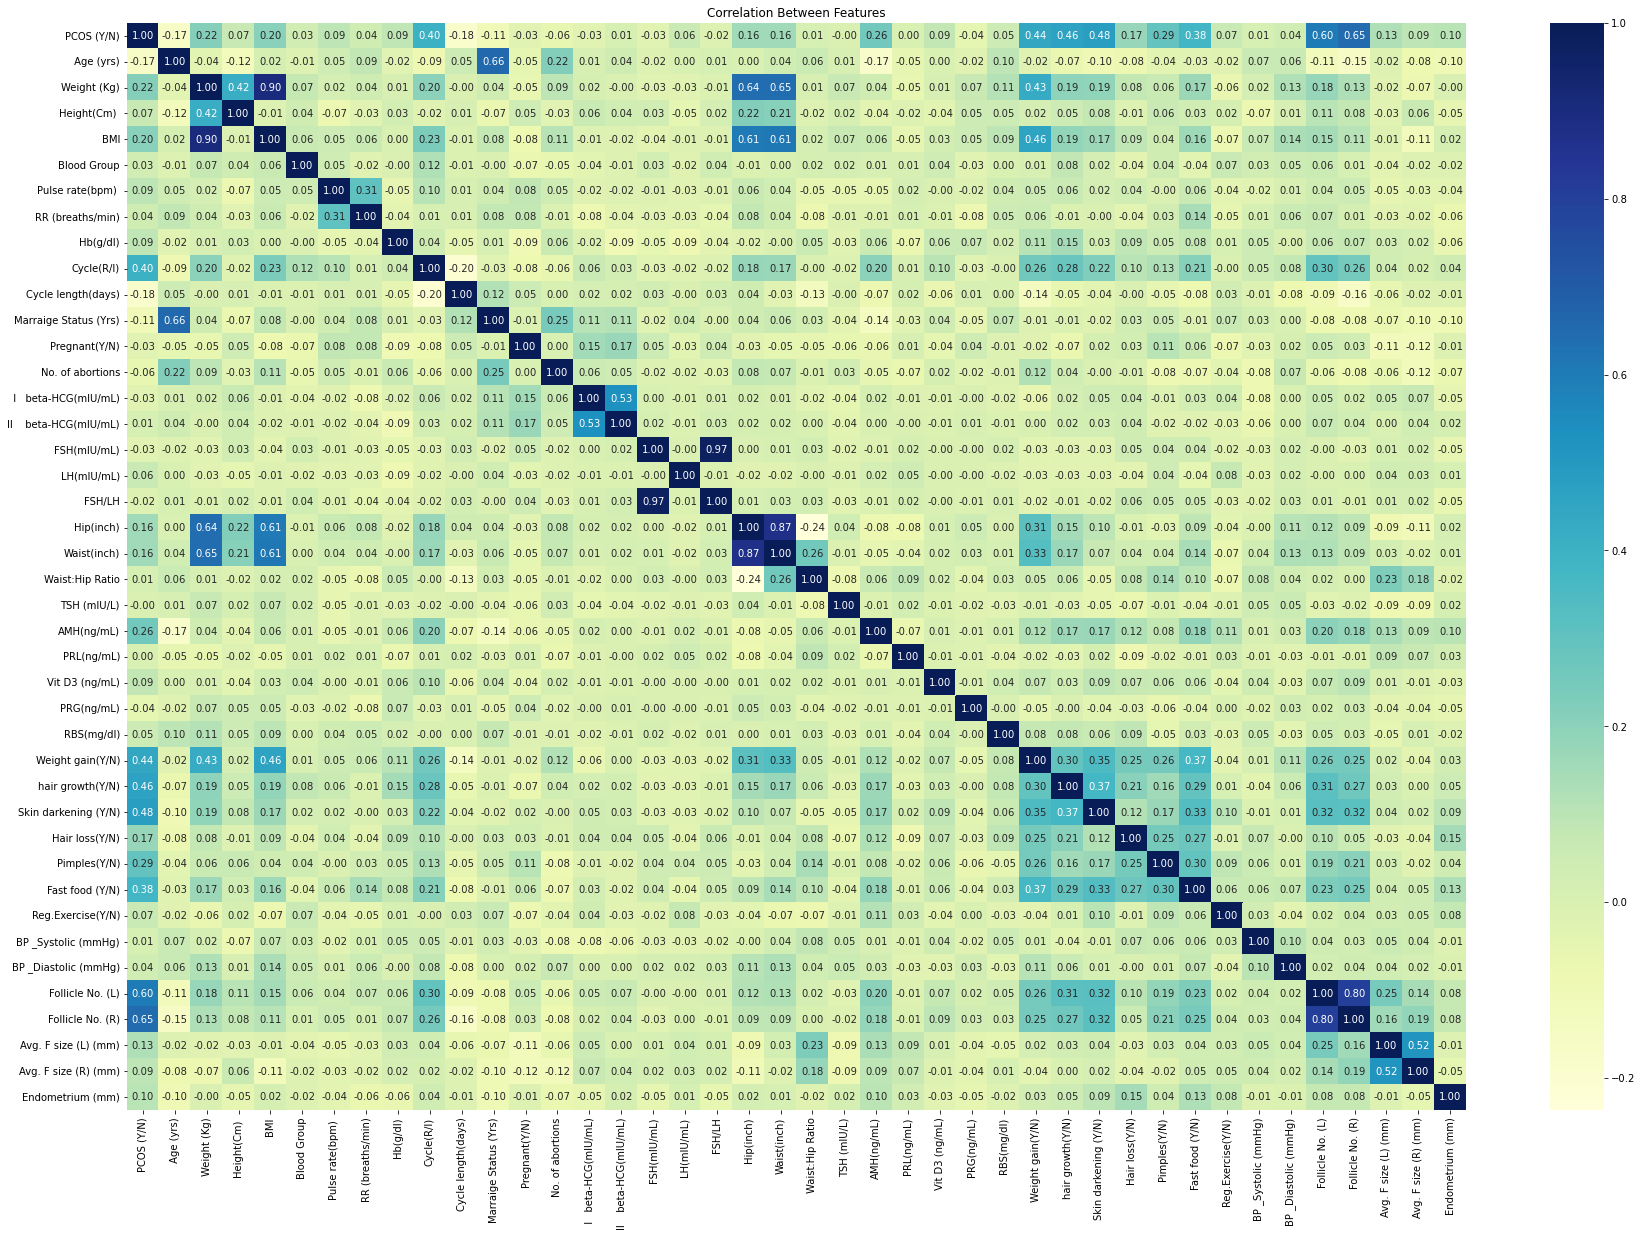

In [79]:
corr_matrix = pcos.corr()
plt.subplots(figsize = (30, 20))
sns.heatmap(corr_matrix, cmap = "YlGnBu", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

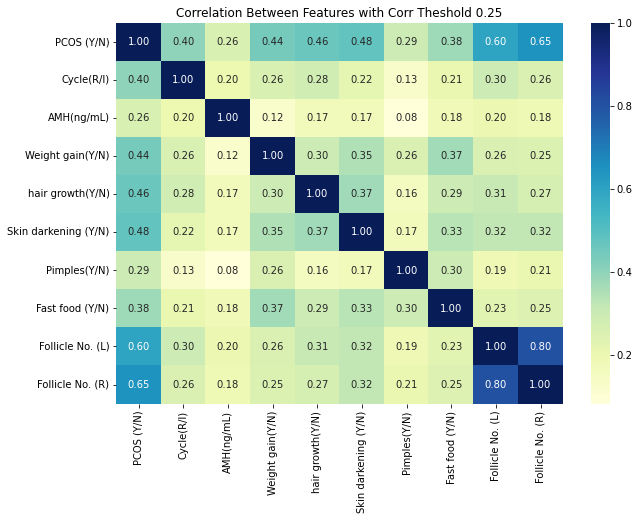

In [80]:
threshold = 0.25 
filtre = np.abs(corr_matrix["PCOS (Y/N)"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
plt.subplots(figsize = (10, 7))
sns.heatmap(pcos[corr_features].corr(), cmap = "YlGnBu", annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Corr Theshold 0.25")
plt.show()

In [81]:
# Choosing colours by giving their hex codes
color = ['#8F00FF','#30D5C8']

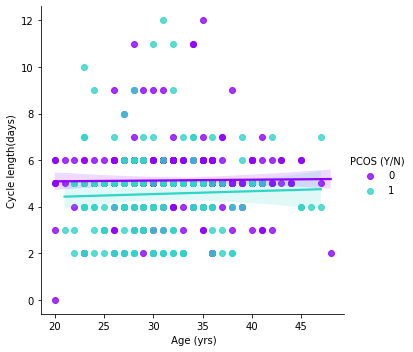

In [82]:
# Length of menstrual phase in PCOS vs normal 
fig = sns.lmplot(data = pcos, x = " Age (yrs)", y = "Cycle length(days)", hue = "PCOS (Y/N)", palette = color)
plt.show(fig)

# The length of the menstrual phase is overall consistent over different ages for normal cases. 
# Whereas in the case of PCOD the length increased with age.

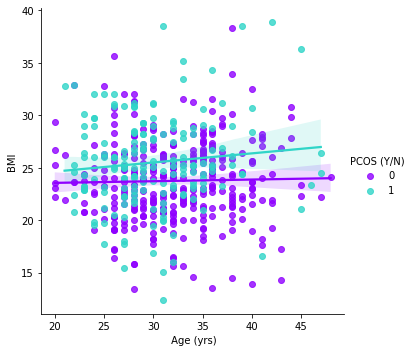

In [83]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data = pcos, x = " Age (yrs)", y = "BMI", hue = "PCOS (Y/N)", palette = color )
plt.show(fig)

# Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

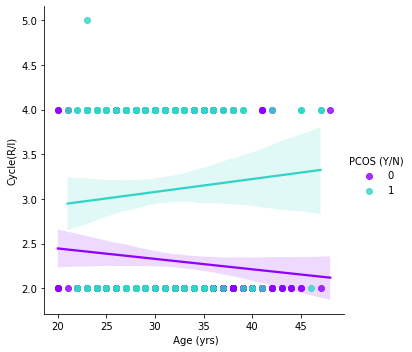

In [84]:
# cycle IR wrt age 
sns.lmplot(data = pcos, x = " Age (yrs)", y = "Cycle(R/I)", hue = "PCOS (Y/N)", palette = color)
plt.show()

# The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

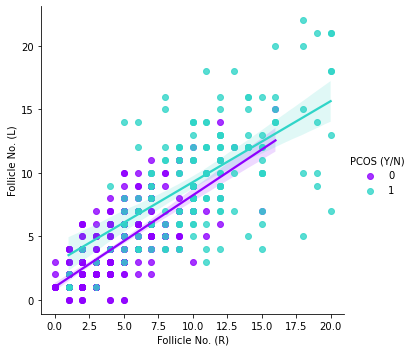

In [85]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data = pcos, x = 'Follicle No. (R)', y = 'Follicle No. (L)', hue = "PCOS (Y/N)", palette = color)
plt.show()

#The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in 
# comparison with the "Normal" patient. 

In [86]:
pcos = pcos.rename(columns = {"PCOS (Y/N)":"Target"})

In [87]:
X = pcos.drop(labels = ["Target"],axis = 1)
y = pcos.Target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [89]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 375
X_test 162
y_train 375
y_test 162


LogisticRegression()
Confusion Matrix: 
 [[96  6]
 [13 47]] 

True Negative: 96
False Positive: 6
False Negative: 13
True Positive: 47
Correct Predictions 88.3 %


C:\Users\psadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



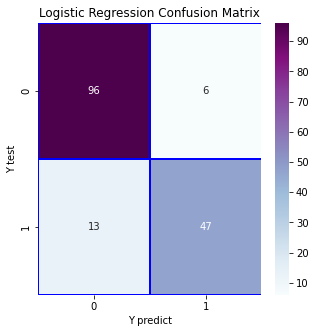

In [163]:
# Logistic regression
logmodel = LogisticRegression()
print(logmodel.fit(X_train, y_train))
y_pred = logmodel.predict(X_test)

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
CorrectPredictionsLr = round((true_negative + true_positive) / len(y_pred) * 100, 1)
print('Correct Predictions', CorrectPredictionsLr, '%')

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidth = 0.7, linecolor = 'blue', fmt = 'g', ax = ax, cmap = "BuPu")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Confusion Matrix: 
 [[102   0]
 [ 59   1]] 

True Negative: 102
False Positive: 0
False Negative: 59
True Positive: 1
Correct Predictions 63.6 %


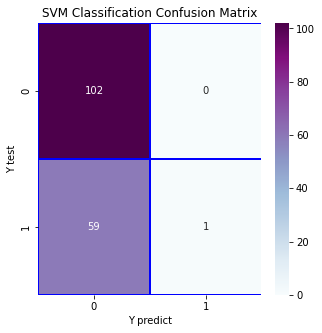

In [162]:
# SVM
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
CorrectPredictionsSvm = round((true_negative + true_positive) / len(y_pred_svc) * 100, 1)
print('Correct Predictions', CorrectPredictionsSvm, '%')

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidth = 0.7, linecolor = 'blue', fmt = 'g', ax = ax, cmap = "BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Confusion Matrix: 
 [[89 13]
 [45 15]] 

True Negative: 89
False Positive: 13
False Negative: 45
True Positive: 15
Correct Predictions 64.2 %


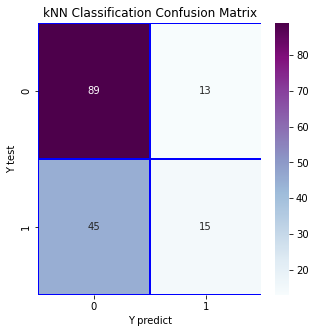

In [164]:
# knn model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

y_pred = knn.predict(X_test)

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
CorrectPredictionsKnn = round((true_negative + true_positive) / len(y_pred) * 100, 1)
print('Correct Predictions', CorrectPredictions, '%')

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidth = 0.7, linecolor = 'blue', fmt = 'g', ax = ax, cmap = "BuPu")
plt.title('kNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [161]:
fig = plt.figure()
Models = ['Logistic Regression', 'SVM', 'kNN']
Accuracy = [CorrectPredictionsLr, CorrectPredictionsSvm, CorrectPredictionsKnn]

# create trace1
trace1 = go.Bar(
                x = Models,
                y = Accuracy,
                marker = dict(color = 'rgb(250, 218, 94)', line = dict(color = 'rgb(0,0,0)', width = 1.5)))
layout = go.Layout(title = 'Accuracy comparison between Logistic Regression, SVM and kNN', 
                   xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

<Figure size 432x288 with 0 Axes>